# Data 620 - Project 2

1.Identify a large 2-node network dataset—you can start with a dataset in a repository. 
Your data should meet the criteria that it consists of ties between and not within two (or more) distinct groups.

2.Reduce the size of the network using a method such as the island method described in chapter 4 of social network analysis.

3.What can you infer about each of the distinct groups?

The Facebook-like Forum Network was attained from the "https://toreopsahl.com/datasets/#online_forum_network"; 
however, the focus in this network is not on the private messages exchanged among users, but on users’ activity 
in the forum. The forum represents an interesting two-mode network among 899 users and 522 topics in that a weight 
can be assigned to the ties based on the number of messages or characters that a user posted to a topic. 

In [71]:
import networkx as net
import csv
import pandas as pd
import requests
import io
import math
import numpy as np
import networkx.algorithms.bipartite as bi
import matplotlib.pyplot as plt
%matplotlib inline

request = requests.get("http://localhost:8889/edit/project2_data.csv").content
data = pd.read_csv("project2_data.csv")

In [95]:
data.head(11)

,user,topic,weight
0,1,1,1
1,1,39,9
2,1,102,2
3,1,154,1
4,1,357,5
5,1,459,1
6,2,14,5
7,2,45,1
8,2,70,1
9,2,81,2


In [96]:
len(request)

10203

In [97]:
fb_csv = csv.reader(open("project2_data.csv"))
users = []
topics = []
fb_g = net.Graph()

for row in fb_csv:
    if row[0] not in users:
        users.append(row[0])
    if row[1] not in topics:
        topics.append(row[1])
    fb_g.add_edge(row[0], row[1], weight = row[2])

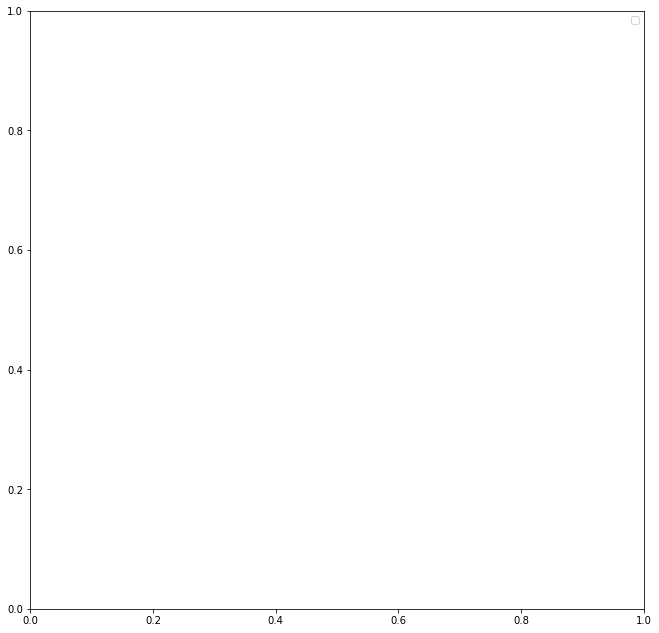

In [105]:
plt.figure(figsize=(11,11))
user_net = bi.weighted_projected_graph(fb_g, users, ratio=False)
weights = [math.log(edata['weight'])for f,t,edata in user_net.edges(data=True)]

plt.legend(["user_net"])
plt.show()

In [106]:
len(user_net)

900

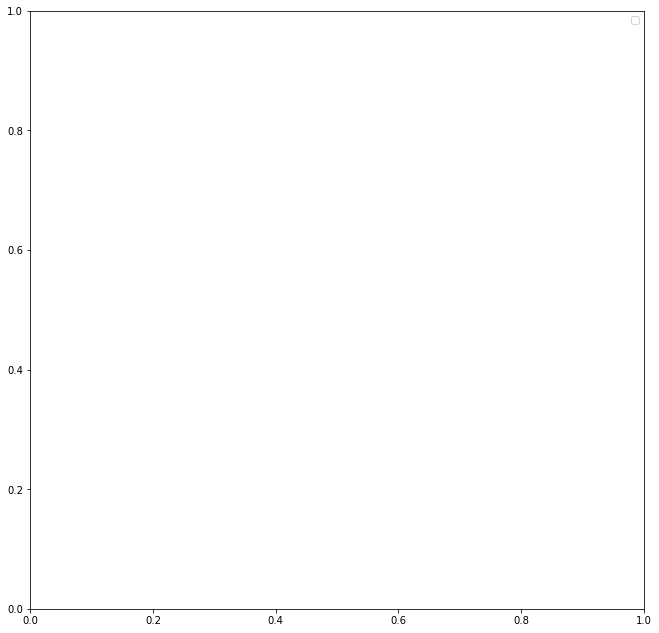

In [114]:
plt.figure(figsize=(11,11))
weights = [math.log(edata['weight'])for f,t,edata in topic_net.edges(data=True)]

plt.legend(["topic_net"])
plt.show()

In [115]:
len(topic_net)

900

In [116]:
def trim_edges(fb_g, weight=1):
    fb_g2 = net.Graph()
    for f, to, edata in fb_g.edges(data=True):
        if edata['weight']> weight:
            fb_g2.add_edge(f, to, edata)
    return fb_g2

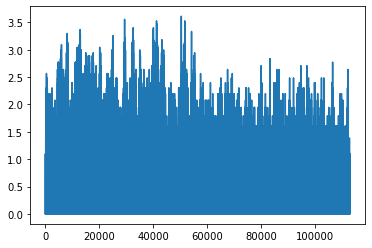

In [117]:
plt.plot(weights)

# Conclusion

It is not clear why the Ada method does not produce the expected results. 
After trimming the data, each network was determined to fit together as an island. 
Therefore, measures of centrality are calculated to identify the central nodes in each network. 
And interestingly, although each network is categorized as having an island, 
both users and threads seem to have different communities; this may mean that, despite their diversity, 
the knots in general are equally well tied among themselves.